**Ансамбли** - Композиции. Техника машинного обучения, сочетающая несколько в себе несколько алгоритмов машинного обучения для получения более мощной модели с лучшей предсказательной эффективностью.

**В задачах регрессии** при использовании композиции $a(x)$ из $N$ _базовых алгоритмов_ $b_{n}(x)$ ответом будет считаться среднее значение ответа каждого алгоритма

$$a(x) = \frac{1}{N}\sum_{n=1}^{N}b_{n}(x),$$

**В задачах классификации** - класс определяется путем *голосования*: объект относится к классу, за который "проголосовало" наибольшее число базовых алгоритмов.

--------

**bias** - Смещение. Отклонение среднего ответа обученного алгоритма от ответа идеального алгоритма.

**variance** - Разброс(Дисперсия). Разброс ответов обученных алгоритмов отнисительно среднего ответа

**Шум** - Характеристика входных данных. Характеризует ошибку идеального алгоритма и которым никак нельзя управлять.


*Ошибка на новых данных = Шум + Смещение + Разброс*, где

**ШУМ** - ошибка лучшей модели $a(x)$\
**СМЕЩЕНИЕ** - отклонение усредненных ответов наших моделей от ответов лучшей модели $a(x)$. \
Показатель того насколько сложные зависимости модель может восстанавливать\
**РАЗБРОС** - дисперсия ответов наших моделей.\
Показатель насколько ответы модели вариативны

## Низкий bias, Высокий variance

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Целевой закон
def func(x):
    return 10 - 15*x + 2*x**2 - 6*x**3

dots = np.linspace(-10, 10, 100)

x_datas = []
f_datas = []
# Генерация 10 выборок с шумами
for i in range(10):
    x_data = np.random.uniform(-10, 10, 20)
    x_datas.append(x_data)
    f_datas.append([func(i) for i in x_data] + np.random.uniform(-500, 500, 20))

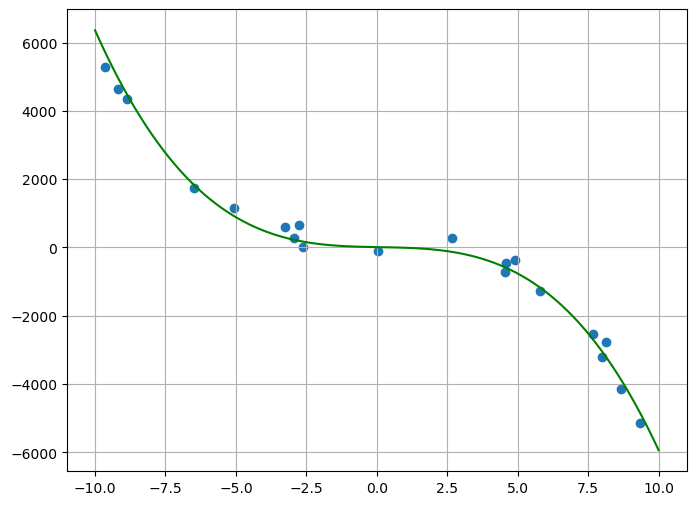

In [45]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.scatter(x_datas[1], f_datas[1])
plt.plot(dots, func(dots), c='green');

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [53]:
# список для хранения моделей
regressors = []

# Обучение 10 деревьев решений на разныъ выборках
for i in range(10):
    regressor = DecisionTreeRegressor(random_state=10, max_depth=10)
    regressor.fit(x_datas[i].reshape(-1, 1), f_datas[i])

    regressors.append(regressor)

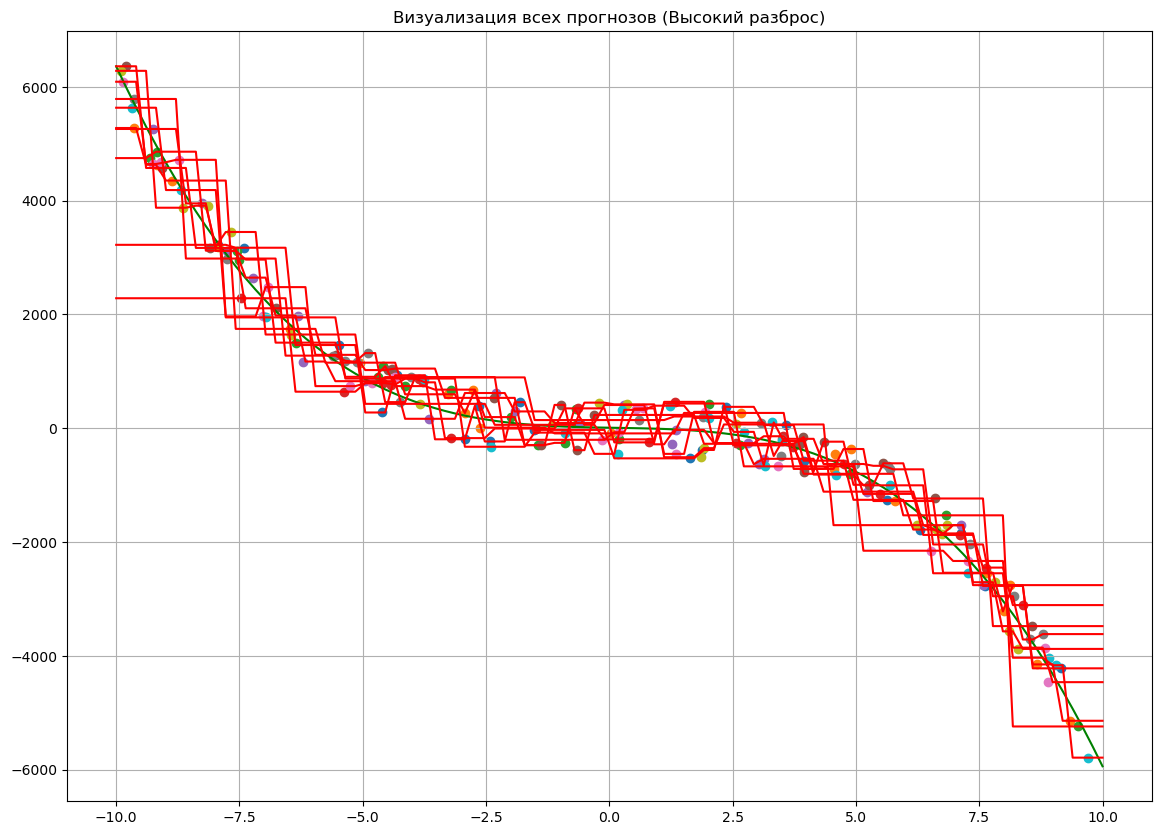

In [97]:
predictions = []

plt.figure(figsize=(14, 10))
plt.grid()
plt.plot(dots, func(dots), color='g')
for i in range(10):
    plt.scatter(x_datas[i], f_datas[i])
    prediction = regressors[i].predict(np.reshape(dots, (-1, 1)))
    predictions.append(prediction)
    plt.plot(dots, prediction, color='r');
plt.title('Визуализация всех прогнозов (Высокий разброс)')
predictions = np.array(predictions)

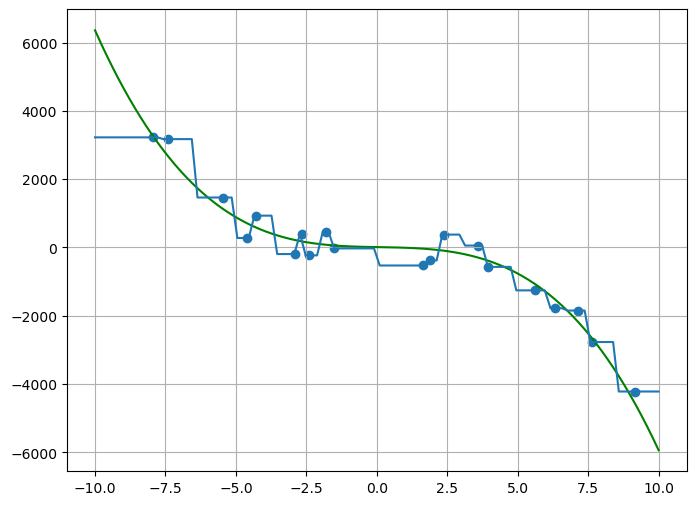

In [68]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(dots, func(dots), color='g')
plt.scatter(x_datas[0], f_datas[0])
plt.plot(dots, predictions[0]);

In [86]:
mean_predictions = np.mean(predictions, axis=0)

In [87]:
mean_predictions.shape

(100,)

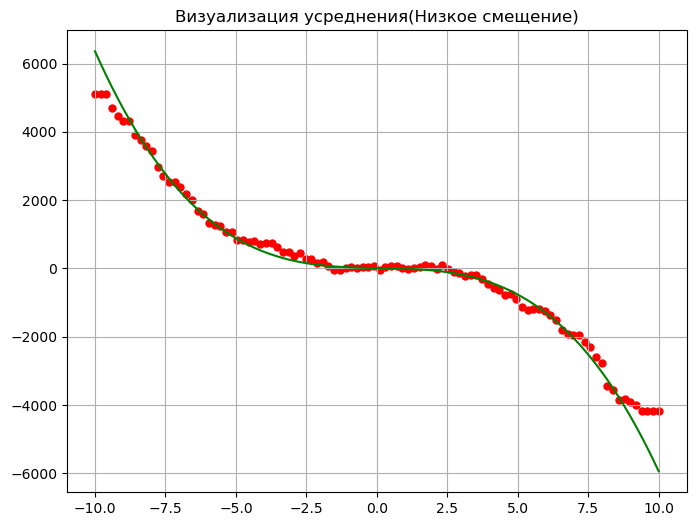

In [95]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(dots, func(dots), c='green')
plt.scatter(dots, mean_predictions, c='red',s=25)
plt.title('Визуализация усреднения(Низкое смещение)');

## Высокий bias, Низкий variance

In [98]:
regressors = []
for i in range(10):
    regressor = LinearRegression()
    
    regressor.fit(np.reshape(x_datas[i], (-1, 1)), f_datas[i])
    regressors.append(regressor)

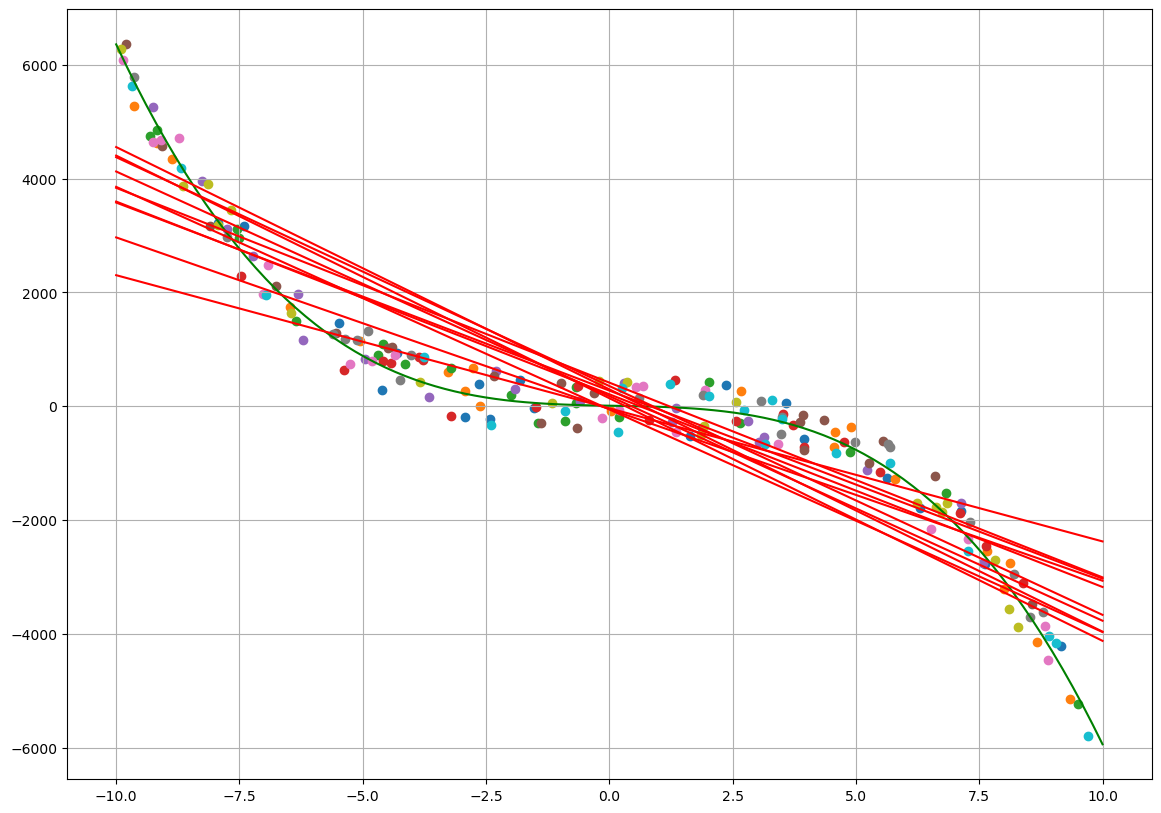

In [101]:
predictions = []

plt.figure(figsize=(14, 10))
plt.grid()
plt.plot(dots, func(dots), color='g')

for i in range(10):
    plt.scatter(x_datas[i], f_datas[i])
    prediction = regressors[i].predict(np.reshape(dots, (-1, 1)))
    predictions.append(prediction)
    plt.plot(dots, prediction, color='r');
predictions = np.array(predictions)

In [102]:
mean_predictions = np.mean(predictions, axis=0)

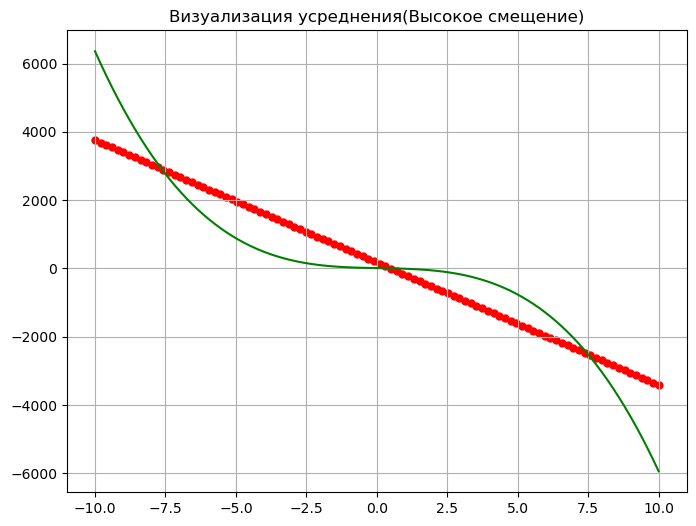

In [104]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(dots, func(dots), c='green')
plt.scatter(dots, mean_predictions, c='red',s=25)
plt.title('Визуализация усреднения(Высокое смещение)');

# Бэггинг

В **композициях** (в усреднении алгоритмов):\
- Смещение не меняется, нужно брать те модели укоторых изначально низкий **bias**
- Разброс меняется как $\frac{\text {разброс базового алгоритма}}{N} + \text {корреляция между базовыми алгоритмами}$

Два подхода, позволяющих уменьшить корреляцию:
- **Бэггинг** (Bootstrap aggregation) - обучение базовых алгоритмов на случайной подвыборке.
- **Метод случайных подпространств** -обучение базовых алгоритмов на случайном подмножестве признаков) или их комбинация.

## Бутстрап

**Бутстрап** - Метод генерации выборок на основе исходной.\
Заключается в получении из выборки длины $l$ нескольких разных выборок той же длины $l$.

Для получения бутстрап-выборки из исходной выборки $l$ раз выбирается случайный элемент, причем каждый раз новый элемент выбирается из всей выборки. Таким образом, в полученной в конечном итоге бутстрап-выборке некоторые элементы исходной выборки будут встречаться несколько раз, а некоторые (примерно 37% выборки) будут вовсе отсутствовать, и при повторении $N$ раз мы получим $N$ разных выборок длиной $l$. 

Например из исходной выбори вида [a, b, c, d, e], возможными бутстрап-выборками могут быть [a, b, a, c, b] или [b, e, e, d, b] и т.д.

In [121]:
#исходная выборка
array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Количество бутстрапированных выборок
n_samples = 5

# Бутстрапирование
bootstrap_samples = np.random.choice(array, size=(n_samples, len(array)), replace=True)
bootstrap_samples

array([[10,  5,  7,  2,  6,  8,  5,  2,  8,  3],
       [ 7,  9,  6,  8,  5,  7,  5,  7,  5, 10],
       [ 2,  4,  7,  9,  4,  8,  3,  7,  3,  3],
       [ 3, 10,  8,  8,  8,  6,  3,  7,  2,  1],
       [ 8,  6,  8,  2,  5,  4,  3,  2,  3,  5]])

## Метод случайных подпространств

Выборка случайных признаков и обучение моделей на разных их комбинациях.